## Checking the fraud to non-fraud ratio

If there are few cases of fraud, then there's little data to learn how to identify them. This is known as class imbalance, and it's one of the main challenges of fraud detection.

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10, 6]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [28]:
# Import pandas and read csv
df = pd.read_csv("data_1\\creditcard_sampledata.csv")

# Explore the features available in your dataframe
df.head(5)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


In [45]:
df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,3999.50000,95357.290375,0.016628,-0.005726,-0.010398,-0.028731,-0.022065,0.000739,0.016121,-0.004941,...,-0.003501,0.028278,0.006422,-0.000855,-0.000284,0.000740,-0.006161,0.005893,89.669246,0.002125
std,2309.54541,46956.240862,1.899212,1.545809,1.477050,1.426184,1.401964,1.332905,1.305012,1.174568,...,0.678019,0.714746,0.553929,0.606846,0.513374,0.485101,0.394584,0.348770,260.188804,0.046052
min,0.00000,64.000000,-29.973363,-29.198899,-19.947726,-5.416315,-40.427726,-7.810116,-21.234463,-26.069936,...,-13.950186,-4.910197,-12.667179,-2.814898,-3.223535,-1.511259,-5.809357,-3.693525,0.000000,0.000000
25%,1999.75000,55189.750000,-0.915243,-0.610001,-0.893566,-0.903137,-0.714806,-0.790640,-0.560447,-0.215935,...,-0.221765,-0.519427,-0.159989,-0.345288,-0.311490,-0.327823,-0.071358,-0.052957,5.990000,0.000000
50%,3999.50000,85758.000000,0.025737,0.040064,0.165369,-0.035525,-0.076317,-0.282476,0.043119,0.019278,...,-0.026597,0.031274,-0.008716,0.038126,0.023790,-0.061720,0.000514,0.011239,22.855000,0.000000
75%,5999.25000,139042.750000,1.321858,0.784179,0.991859,0.752604,0.601602,0.403259,0.581711,0.331131,...,0.191495,0.549468,0.144751,0.440633,0.344371,0.246298,0.086333,0.076835,78.432500,0.000000
max,7999.00000,172766.000000,2.373022,11.447082,3.985446,9.074932,13.815072,23.917837,44.054461,9.561121,...,14.507345,4.222704,19.228169,3.577753,2.520869,2.693658,5.352193,15.649134,10199.440000,1.000000


In [29]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
display(occ)

# Print the ratio of fraud cases
occ = df['Class'].value_counts(normalize=True)
display(occ)

0    7983
1      17
Name: Class, dtype: int64

0    0.997875
1    0.002125
Name: Class, dtype: float64

## Plotting fraud data
Visualize the fraud to non-fraud ratio. It is always a good starting point in your fraud analysis, to look at your data first, before you make any changes to it.

In [75]:
df = pd.read_csv("data_1\\creditcard_sampledata_3.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,...,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,-0.014675,0.044325,-0.035144,0.002494,-0.046625,-0.046340,-0.043020,-0.008398,-0.027331,-0.056943,...,-0.003516,-0.009421,-0.004147,-0.001200,-0.003314,-0.004836,-0.005726,0.002482,86.117232,0.009901
std,1.952784,1.558235,1.691458,1.493592,1.321320,1.254301,1.338170,1.323247,1.134506,1.278092,...,0.756735,0.724749,0.601276,0.599400,0.517363,0.481913,0.411055,0.302719,227.210259,0.099020
min,-25.266355,-18.701995,-26.823673,-4.575708,-18.664251,-6.357009,-23.783470,-41.484823,-8.504285,-17.141514,...,-20.262054,-5.532541,-17.026156,-2.307453,-3.308049,-1.715640,-7.976100,-5.048979,0.000000,0.000000
25%,-0.926226,-0.589562,-0.873696,-0.871759,-0.733235,-0.777552,-0.571678,-0.211263,-0.651215,-0.541561,...,-0.231508,-0.558904,-0.161166,-0.354973,-0.316947,-0.331584,-0.070963,-0.052133,4.990000,0.000000
50%,0.009592,0.088726,0.168377,-0.027034,-0.060932,-0.304225,0.036753,0.000985,-0.052724,-0.109888,...,-0.035204,-0.013332,-0.011305,0.038272,0.019200,-0.059882,0.003521,0.012842,20.260000,0.000000
75%,1.310062,0.809298,1.017166,0.763626,0.603678,0.356664,0.594029,0.313264,0.568374,0.437051,...,0.196481,0.509243,0.146835,0.441278,0.348177,0.228486,0.095662,0.077357,75.000000,0.000000
max,2.422508,14.323254,3.760965,11.885313,9.880564,7.473970,9.288494,16.633103,8.054123,12.562347,...,19.283602,5.805795,13.218751,3.535179,3.590787,2.961609,4.623508,9.876371,4584.880000,1.000000


In [77]:
def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 29]
    y=np.array(y).astype(np.float)
    return X,y

In [78]:
#df_sub = pd.read_csv("data_1\\creditcard_sampledata_3.csv")

#select_columns = df_sub.columns.tolist()
#vs = [val for val in select_columns if 'V' in val]
#df2 = df_sub[vs]
#X = df2.values
#y = df_sub.Class.values

In [79]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

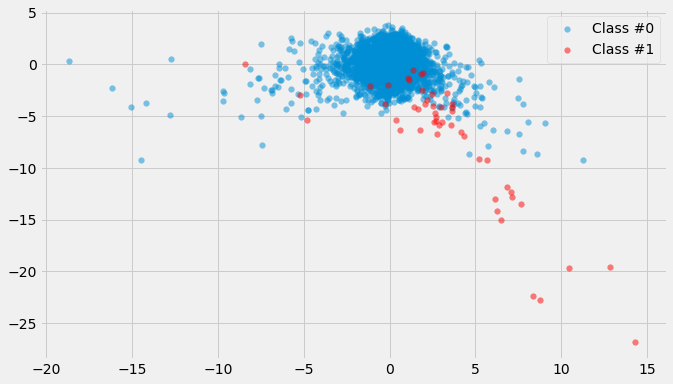

In [80]:
# Create X and y from the prep_data function 
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

## Data Resampling

### Applying SMOTE
Apply Synthetic Minority Over-sampling Technique (SMOTE). Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations.

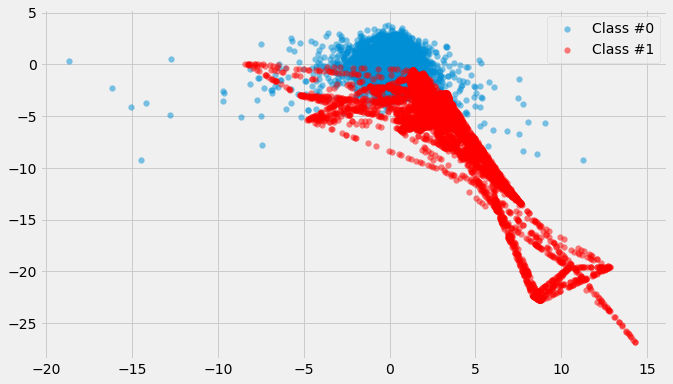

In [81]:
#Conda - imbalanced-learn is a python package offering a number of re-sampling techniques commonly used
#in datasets showing strong between-class imbalance. It is compatible with scikit-learn
#and is part of scikit-learn-contrib projects
from imblearn.over_sampling import SMOTE

# Define the resampling method
method = SMOTE(kind='regular')

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

Minority class more visible

In [92]:
#Compare SMOTE to original data
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))
print("\n")
# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

0.0    5000
1.0      50
dtype: int64


1.0    5000
0.0    5000
dtype: int64


 SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class

## Fraud Detection Algorithms 
### Exploring the traditional way to catch fraud
Define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

In [83]:
# Get the mean for each group
df_sub.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df_sub['flag_as_fraud'] = np.where(np.logical_and(df_sub.V1 < -3,df_sub.V3 < -5 ), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df_sub.Class, df_sub.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              4984  16
1                28  22


In [84]:
#try using sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(df_sub.Class, df_sub.flag_as_fraud)

array([[4984,   16],
       [  28,   22]], dtype=int64)

Detect 22 out of 50 fraud cases, but can't detect the other 28, and get 16 false positives. 

### Using ML classification to catch fraud

In [85]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.89      0.80      0.84        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.94      0.90      0.92      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1504    1]
 [   2    8]]


We are getting much less false positives and we're catching a higher percentage of fraud cases, so that is also better than before.  Let's now explore whether we can improve the prediction results even further with resampling methods.

### Logistic regression combined with SMOTE

In [38]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

### Using a pipeline

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.62      1.00      0.77        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.81      1.00      0.88      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1499    6]
 [   0   10]]


SMOTE slightly improves our results. We now manage to find all cases of fraud, but we have a slightly higher number of false positives, 6 cases. Remember, not in all cases does resampling necessarily lead to better results. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly.

## 2) Fraud Detection Using Labelled Data
How to flag fraudulent transactions with supervised learning. Use classifiers, adjust them and compare them to find the most efficient fraud detection model.

In [108]:
df = pd.read_csv("data_2\\creditcard_sampledata_2.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


### Natural hit rate
Explore how prevalent fraud is in the dataset, to understand what the "natural accuracy" is, if we were to predict everything as non-fraud. It's is important to understand which level of "accuracy" you need to "beat" in order to get a better prediction than by doing nothing. Create a random forest classifier for fraud detection. That will serve as the "baseline" model that you're going to try to improve.

In [110]:
X, y = prep_data(df)

# Count the total number of observations from the length of y
total_obs = y.shape[0]

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print("Natural accuacy is {}".format(percentage))

Natural accuacy is 95.8904109589041


This tells us that by doing nothing, we would be correct in 95.9% of the cases. So now you understand, that if we get an accuracy of less than this number, our model does not actually add any value in predicting how many cases are correct.

## Random Forest Classifier
Create a first random forest classifier for fraud detection. Hopefully you can do better than the baseline accuracy you've just calculated, which was roughly 96%. This model will serve as the "baseline" model that you're going to try to improve

In [117]:
# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

# Print the accuracy performance metric
print("Accuracy score of Random Forest is {}".format(accuracy_score(y_test, predicted)))

Accuracy score of Random Forest is 0.9904109589041096


## Performance evaluation

### Accuracy isn't everything Throw accuracy out of the window when working on fraud detection problems

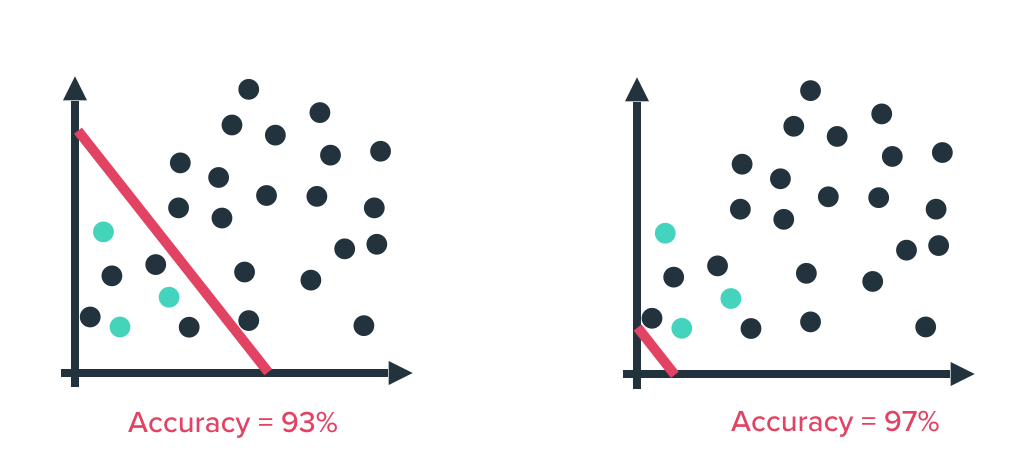

In [132]:
from IPython.display import Image
Image(filename='Page-10-Image-8.png',width=600,height=600)

Accuracy isn't everything
Throw accuracy out of the window when working on fraud detection problems